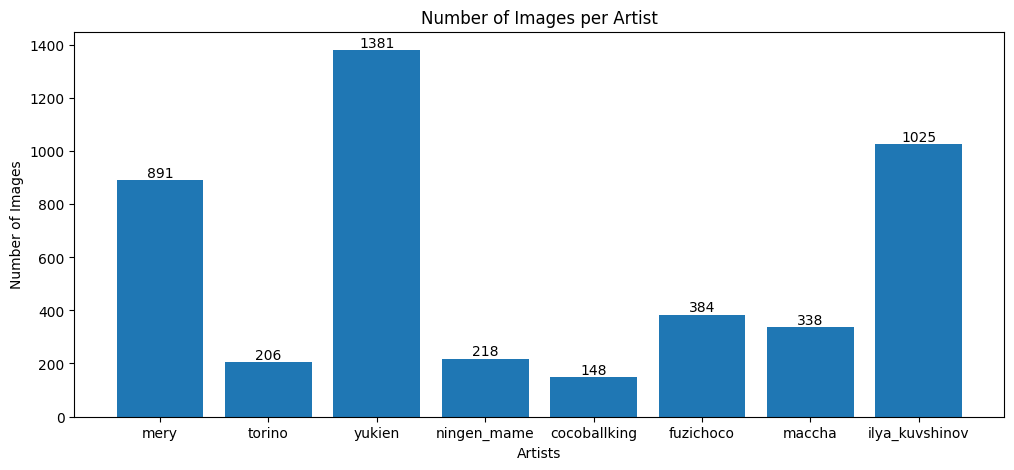

In [6]:
import os
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = "dataset"

# Get folder names
artist_folders = ['mery', 'torino', 'yukien', 'ningen_mame', 'cocoballking', 'fuzichoco', 'maccha', 'ilya_kuvshinov']
artist_names = ['0 - mery', '1 - torino', '2 - yukien', '3 - ningen_mame', '4 - cocoballking', '5 - fuzichoco', '6 - maccha', '7 - ilya_kuvshinov']

# Count images per artist
image_counts = [len(os.listdir(os.path.join(dataset_path, folder))) for folder in artist_folders]

# Plot bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(artist_folders, image_counts)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')


plt.xlabel("Artists")
plt.ylabel("Number of Images")
plt.title("Number of Images per Artist")
# plt.xticks(rotation=15)
plt.show()


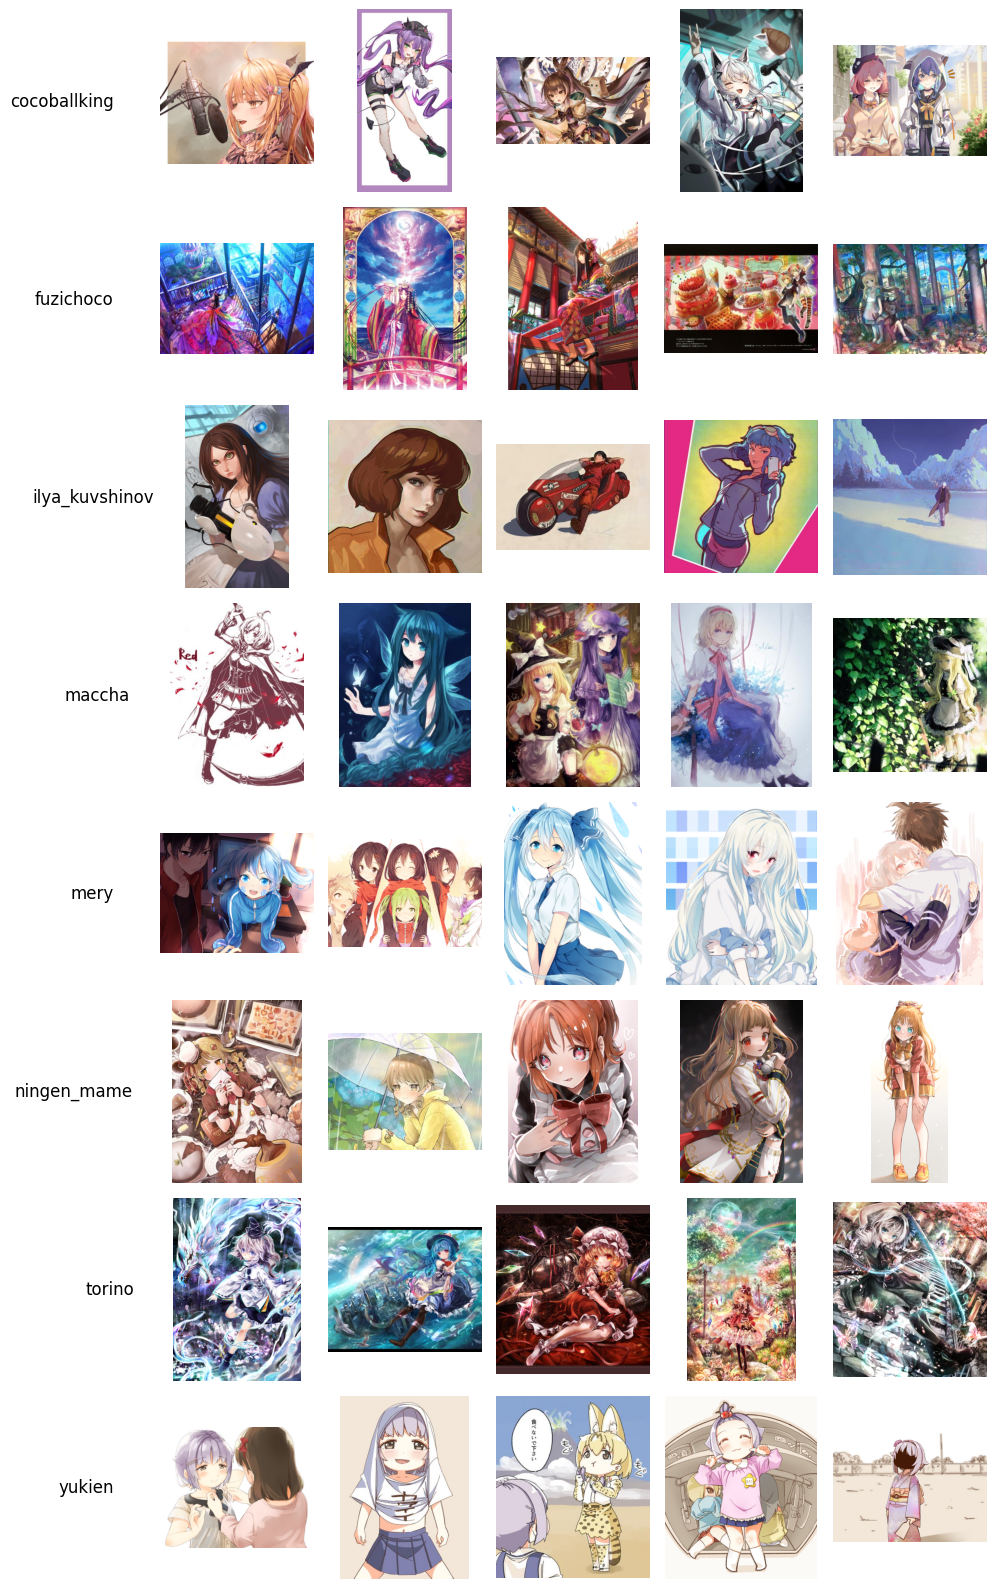

In [3]:
import os
import matplotlib.pyplot as plt

# --- Configuration ---
dataset_path = "dataset"
samples_per_artist = 5

# --- Grid of Sample Artworks ---
fig, axes = plt.subplots(len(artist_folders), samples_per_artist,
                         figsize=(samples_per_artist*2, len(artist_folders)*2))

for i, artist in enumerate(artist_folders):
    files = [f for f in os.listdir(os.path.join(dataset_path, artist))
             if f.lower().endswith(('.png','.jpg','.jpeg'))][:samples_per_artist]
    for j, fname in enumerate(files):
        img = plt.imread(os.path.join(dataset_path, artist, fname))
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.text(-0.3, 0.5, artist, transform=ax.transAxes,
                    fontsize=12, va='center', ha='right')

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process
df = pd.read_csv('dataset.csv')
df_numeric = df.drop(columns=['image_path'])
summary = df_numeric.agg(['mean', 'std'])

summary


,artist_label,edge_density,laplacian_variance,shannon_entropy,hs_colorfulness,color_spread,color_entropy,temp_mean,temp_stddev,gray_mean,...,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9
mean,3.343412,0.105991,3144.866596,11.404059,38.856867,0.863779,2.246049,10.364167,32.989866,0.639357,...,0.049025,0.068853,0.027367,0.072119,0.133291,0.112946,0.039612,0.080422,0.296298,0.120066
std,2.596468,0.049579,3394.610660,3.591484,22.012168,0.107702,0.589659,25.379535,18.408806,0.175612,...,0.020322,0.021729,0.015739,0.027267,0.057276,0.037844,0.017393,0.019600,0.181967,0.039768


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process
df = pd.read_csv('dataset.csv')
df_numeric = df.drop(columns=['image_path'])
summary = df_numeric.groupby('artist_label').agg(['mean', 'std'])

# Flatten MultiIndex columns
summary.columns = [f"{col}_{stat}" for col, stat in summary.columns]

# Round values for better readability
summary = summary.round(3)

# Display
from tabulate import tabulate

print(tabulate(summary, headers='keys', tablefmt='psql', floatfmt=".3f"))


+----------------+---------------------+--------------------+---------------------------+--------------------------+------------------------+-----------------------+------------------------+-----------------------+---------------------+--------------------+----------------------+---------------------+------------------+-----------------+--------------------+-------------------+------------------+-----------------+--------------------+-------------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+
|   artist_label |   edge_density_mean |   edge_density_std |   laplacian_variance_mean |   laplacian_variance_std |   shannon_entropy_mean |   shannon_entropy_std |   hs_colorfulness_mean |   hs_colorfulness_std |   color_spread_mean |   color_spread

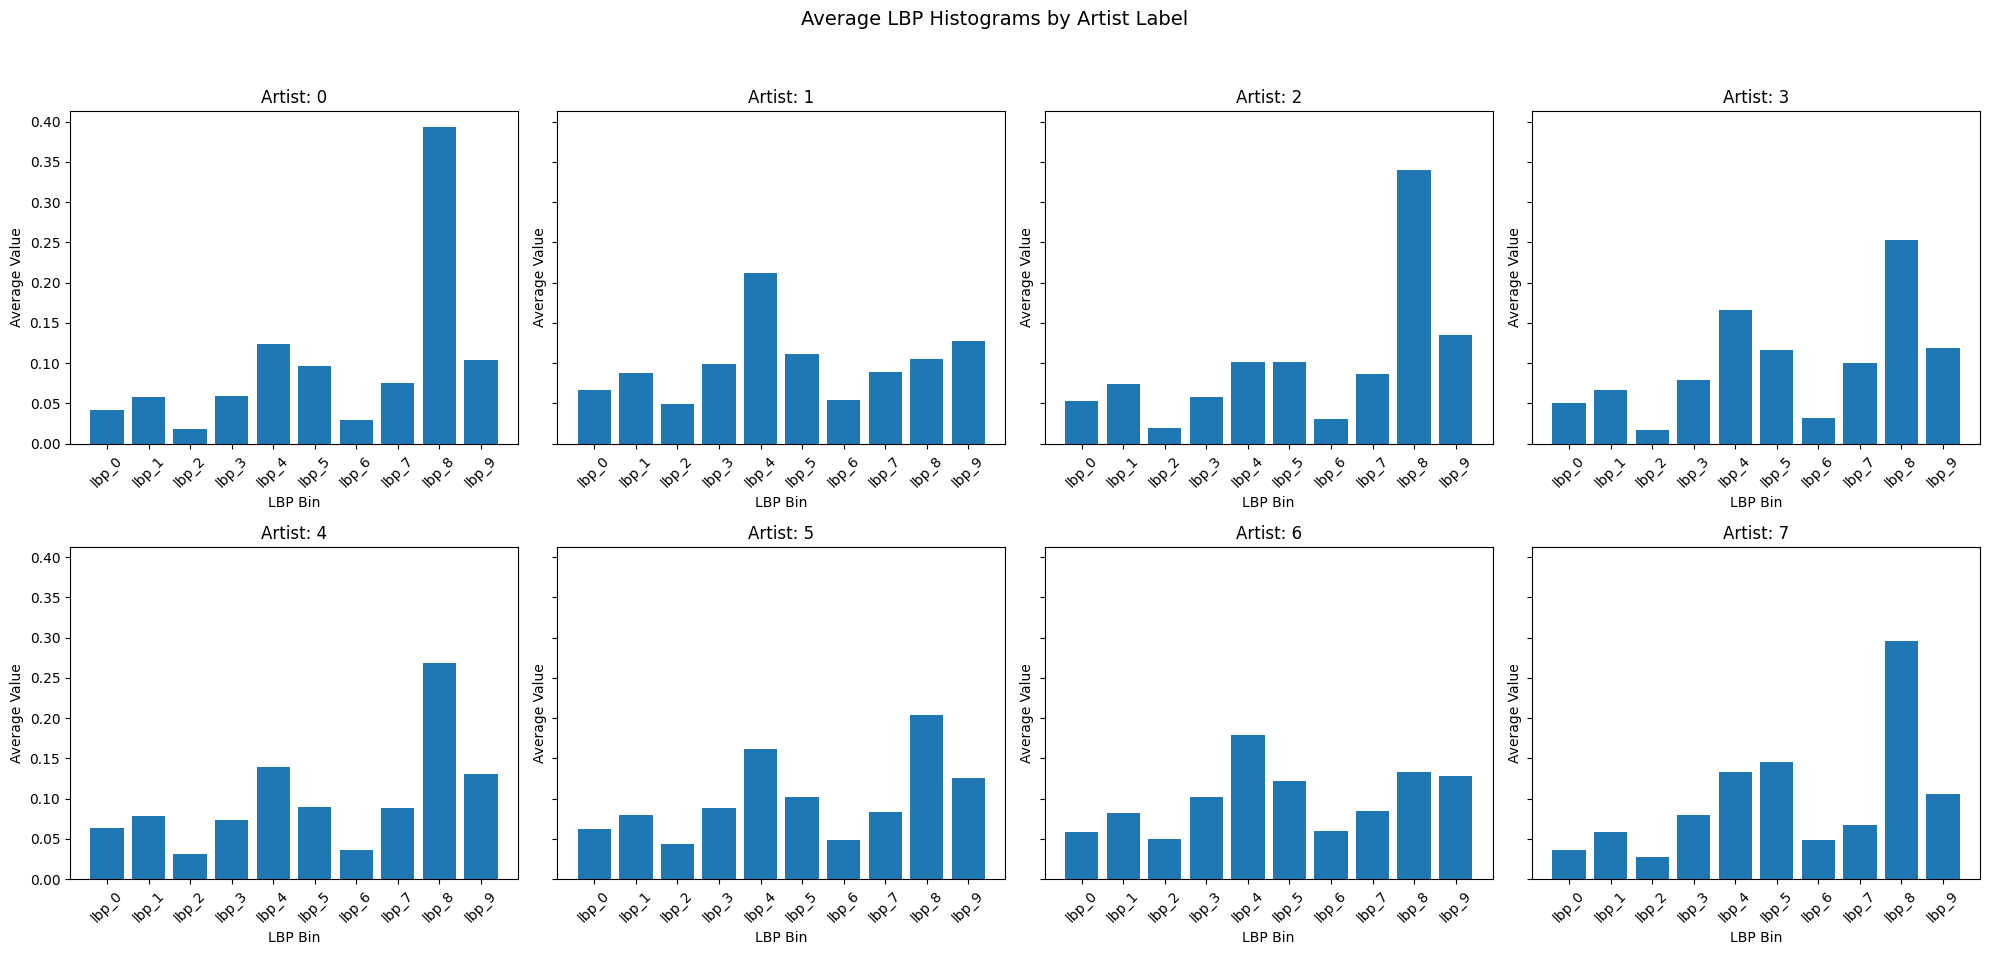

In [6]:
# Extract LBP columns
lbp_columns = [col for col in df.columns if col.startswith('lbp_')]
df_lbp = df[['artist_label'] + lbp_columns]

# Group by artist label and compute mean
mean_lbps = df_lbp.groupby('artist_label').mean()

num_artists = len(mean_lbps)

max_plots_per_row = 4
nrows = (num_artists + max_plots_per_row - 1) // max_plots_per_row
ncols = min(num_artists, max_plots_per_row)

# Plot bar charts
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, 
                        figsize=(5*ncols, 5*nrows), 
                        sharey=True, 
                        squeeze=False)

axes_flat = axes.flatten()

for idx, (label, row) in enumerate(mean_lbps.iterrows()):
    if idx >= len(axes_flat):  # Safety check in case we have more artists than subplots
        break
    ax = axes_flat[idx]
    ax.bar(lbp_columns, row.values)
    ax.set_title(f'Artist: {label}')
    ax.set_xlabel('LBP Bin')
    ax.set_ylabel('Average Value')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for ax in axes_flat[num_artists:]:
    ax.set_visible(False)

plt.suptitle('Average LBP Histograms by Artist Label', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


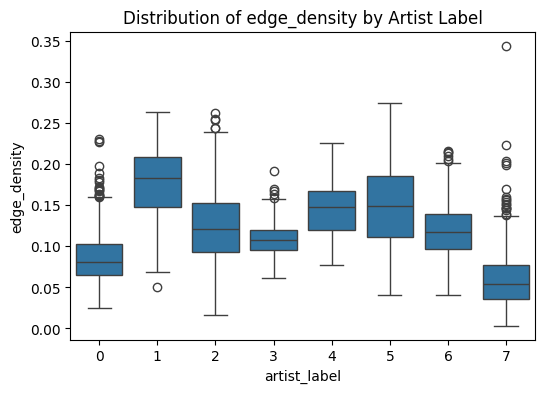

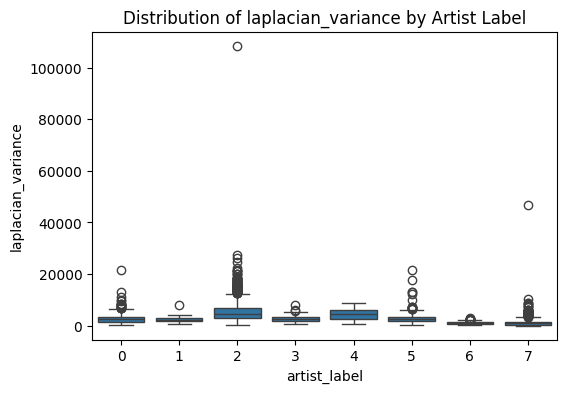

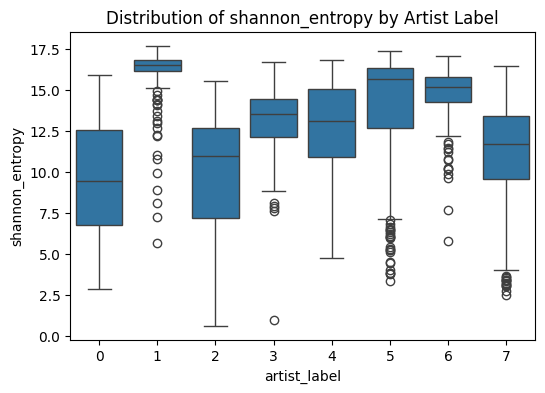

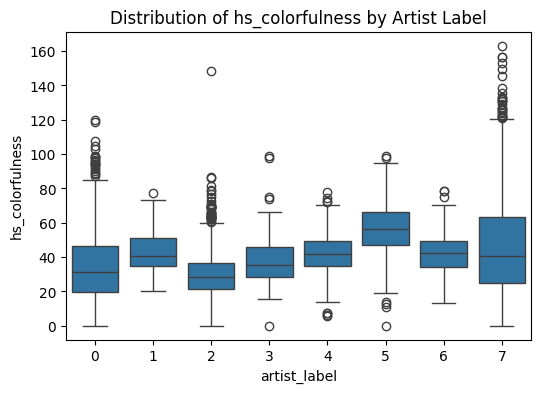

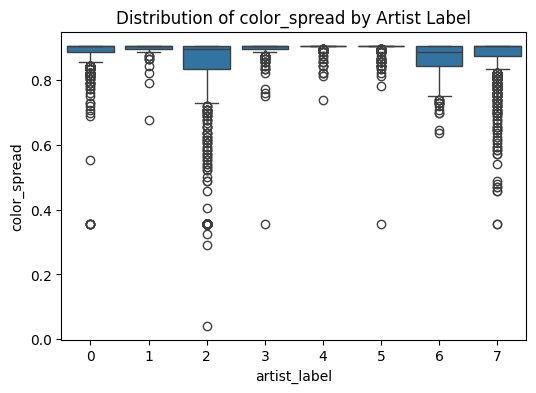

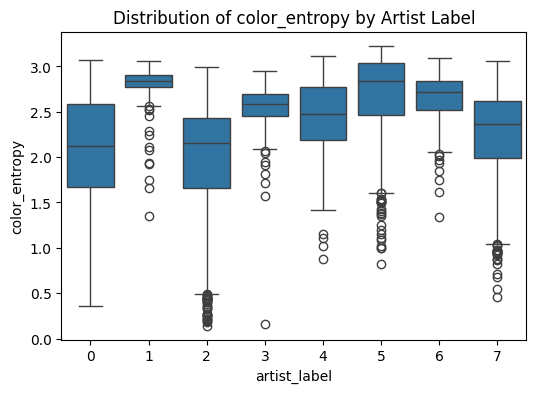

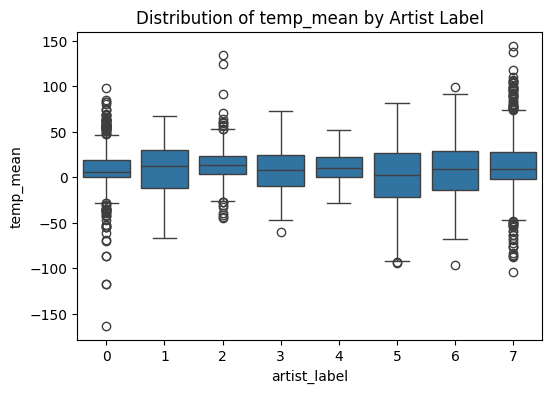

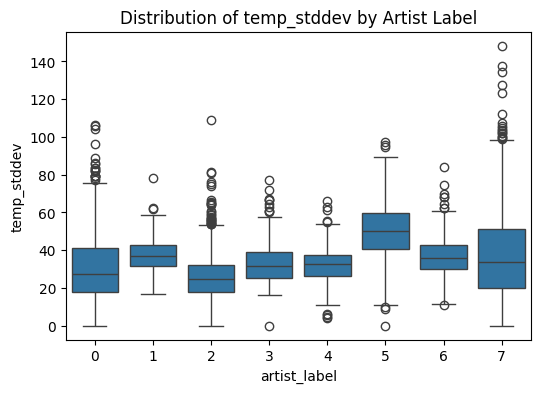

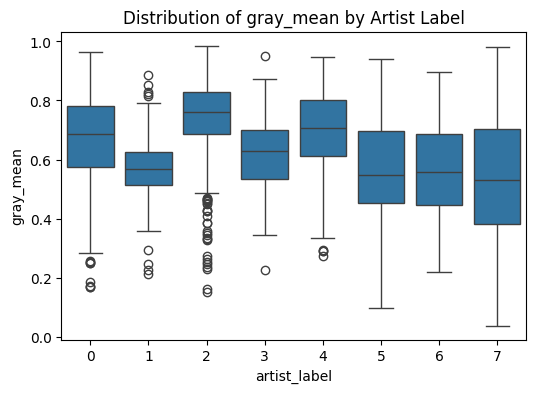

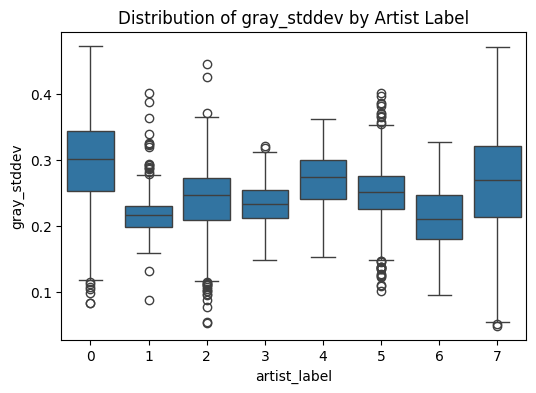

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# laplacian_variance outlier: dataset/yukien\danbooru_4440329_9d164b04d60e5ee4344611ec7ee0e950.png
features = ['edge_density', 'laplacian_variance', 'shannon_entropy',
            'hs_colorfulness', 'color_spread', 'color_entropy', 'temp_mean', 'temp_stddev', 'gray_mean', 'gray_stddev']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='artist_label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Artist Label')
    plt.show()


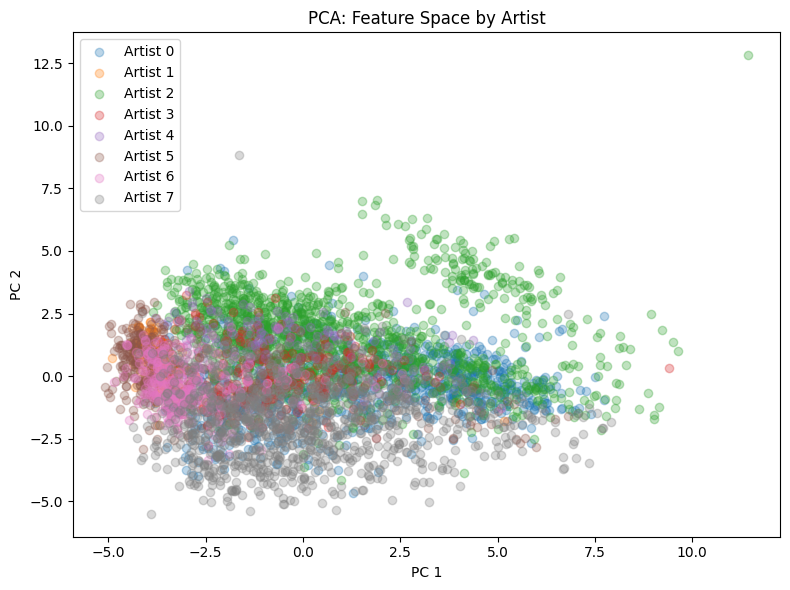

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['image_path', 'artist_label'])
labels = df['artist_label']

# Normalize
X_scaled = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
for label in sorted(labels.unique()):
    idx = labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Artist {label}', alpha=0.3)

plt.title('PCA: Feature Space by Artist')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()


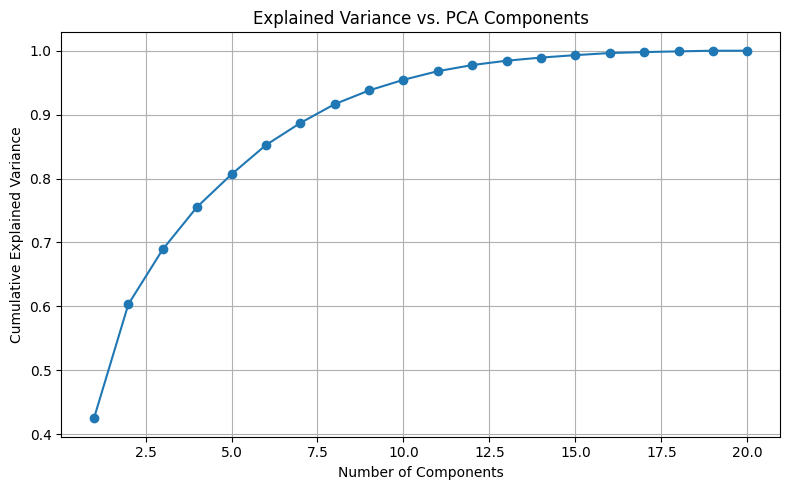

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare data
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['image_path', 'artist_label'])

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA without limiting components
pca = PCA()
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()
